# Chaitanya_GondiNanda_B89_MiTH

# I. Problem Description

#### Detecting fraud for transactions in a payment gateway

A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction due to its extremely low processing fees for handling online vendors’ digital payments. This strategy has led to very low costs of acquiring new vendors.

Unfortunately, due to the cheap processing fees, the company was not able to able to build and deploy a robust and fast fraud detection system. Consequently, a lot of the vendors have accumulated significant economic burden due to handling fraudulent transactions on their platforms. This has resulted in a significant number of current clients leaving IndAvenue’s payment gateway platform for more expensive yet reliable payment gateway companies.

The company’s data engineers curated a dataset that they believe follows the real world distribution of transactions on their payment gateway. The company hired Insofe and provided it with the dataset, to create a fast and robust AI based model that can detect and prevent fraudulent transactions on its payment gateway.

They have provided you with the dataset that has the `is_fraud` column, which encodes the information whether a transaction was fraudulent or not.

In this hackathon, you will now have to use this curated data to create a machine learning model that will be able to predict the `is_fraud` column.

# II. Dataset Description

#### Target attribute: "is_fraud" (discrete variable: 2 classes)

There are 3 CSV files provided to us, they are described below: 

● train_data.csv: Every transaction in the database has a unique ‘transaction_number’ and an associated ‘is_fraud’ target label along with several features associated with the transaction. 

● test_data.csv: The test data has all the columns provided in the train dataset other than the target column. 

● sample_submission.csv: The format of CSV file required for submission to the evaluation backend 

Note: Negative values in the money_transacted column relate to amount credited, while positive values signify amount debited

# III. Hackathon Tasks

As part of this hackathon, you are expected to complete three tasks: i) Exploratory Analysis ii) ML Modelling iii) Recommendations and Deployment Strategies

#### Exploratory analysis

Exploratory Data Analysis using visualizations, numerical analysis, and describing the findings.

● List down the insights/patterns observed from the visualizations

● Explain the impact of the most important attributes on the target attribute observed from data visualizations.

#### ML Modelling

You are expected to create a robust fraud detection framework by engineering new features, tuning, and improving the baseline ML model performance.

#### Recommendations to the business

● What are your recommendations for IndAvenue?

● Any final visualizations you would use to convey your recommendations?

● Can you explain your ML model using non-technical terms?

● Which simple strategies would you use to ensure fast customer checkout?

# IV. Evaluation Metric

● The evaluation metric for this hackathon is the F1 Score

<h4><font color='#F55905'> <u>BUSINESS PROBLEM:</u></font></h4>

Improve Payment Gateway system of 'IndAvenue' by analyzing real world distribution of their own Payment Gateway transactions, and create a fast and robust AI based model that can detect and prevent fraudulent transactions on its payment gateway.By developing such a prediction algorithm, the company can regain the confidence of their existing customers before they leave and also attract new customers or welcome back their previous customers.

<h4><font color='#F55905'><u>MACHINE LEARNING PROBLEM:</u></font></h4>

This is a Classification problem to predict whether a transaction is fraudulent or not. 

<h4><font color='#F55905'><u> EVALUATION METRIC:</u></font></h4>

Evaluation metric for this classification problem is the F1 Score

#### Mount Google Drive

In [323]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [324]:
# custom function for classification report output of both Train and Test
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred))

#### Load required libraries

In [325]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report

#### Read Train and Test datasets

In [326]:
train_df = pd.read_csv('/content/gdrive/MyDrive/INSOFE-Batch89/Final Hackathon/train_data-1611220940820.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/INSOFE-Batch89/MiTH/test_data-1611220982388.csv')

#train_df = pd.read_csv('train_data-1611220940820.csv')
#test_df = pd.read_csv('test_data-1611220982388.csv')

In [333]:
print(train_df.columns)
print(test_df.columns)

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')
Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category'],
      dtype='object')


In [334]:
print(train_df.shape)
print(test_df.shape)

(76529, 11)
(19133, 10)


In [335]:
print(train_df.count())
print(test_df.count())

transaction_number          76529
user_id                     76529
payment_method              76529
partner_id                  76529
partner_category            76529
country                     76529
device_type                 76529
money_transacted            76529
transaction_initiation      76529
partner_pricing_category    76529
is_fraud                    76529
dtype: int64
transaction_number          19133
user_id                     19133
payment_method              19133
partner_id                  19133
partner_category            19133
country                     19133
device_type                 19133
money_transacted            19133
transaction_initiation      19133
partner_pricing_category    19133
dtype: int64


In [337]:
print(train_df.dtypes.value_counts())
print(test_df.dtypes.value_counts())

int64      5
object     5
float64    1
dtype: int64
object     5
int64      4
float64    1
dtype: int64


#### List top 5 rows

In [327]:
train_df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [328]:
test_df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


#### List last 5 rows

In [329]:
train_df.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0
76528,1051344513778987,6754801,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-11 19:08:18+00:00,2,0


In [330]:
test_df.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-01 13:02:16+00:00,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2016-12-26 19:41:23+00:00,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-24 04:29:06+00:00,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,2016-12-04 15:38:47+00:00,4
19132,84390778936647,14500864,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,40.0,2017-01-12 21:24:24+00:00,2


#### List sample 10 rows

In [331]:
train_df.sample(10)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
32741,2208630763998989,16265089,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-1.00,2016-12-13 09:51:23+00:00,2,0
21796,3532642667000,1602756,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-0.50,2016-12-07 06:50:17+00:00,2,0
38182,1039940247547144,12187081,visa_master_debit_cards,149891,cat_5,IND_INR,other_pcs,32.00,2017-01-18 03:36:27+00:00,2,0
56154,2091995272442375,10465225,e_wallet_payments,149891,cat_5,IND_INR,other_pcs,70.00,2017-01-31 16:05:31+00:00,2,0
55599,1963879052383989,26977636,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.00,2016-12-21 19:13:21+00:00,2,0
15338,1040864328515584,176400,other_debit_cards,118335,cat_1,IND_INR,other_pcs,60.00,2017-02-11 13:48:51+00:00,2,0
68633,1406848106068651,15555136,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,12.00,2016-12-10 18:30:00+00:00,2,0
42010,1899759183464051,3330625,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.00,2016-12-28 11:20:10+00:00,2,0
57282,1915864488000000,21022225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-12.44,2016-12-27 10:10:26+00:00,2,0
32618,51159842179867,15023376,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-2.50,2016-12-26 11:23:17+00:00,2,0


In [332]:
test_df.sample(10)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
8110,2347334289000000,4743684,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.00,2017-01-16 13:18:56+00:00,2
5298,7312680621000,13912900,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-1.00,2017-01-22 10:12:42+00:00,2
14655,168644920603249,27604516,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-10.00,2016-12-26 16:27:43+00:00,2
19025,313420430726983,13053769,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-1.00,2017-01-15 14:57:23+00:00,2
6697,36852898600952,12159169,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,20.00,2017-01-12 18:11:24+00:00,2
5525,154422002125000,22193521,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-2.34,2017-02-06 07:35:48+00:00,2
6029,49649380389064,7890481,visa_master_debit_cards,165669,cat_3,IND_INR,other_pcs,80.00,2016-11-19 09:29:24+00:00,2
3598,49261349002312,116281,e_wallet_payments,173558,cat_3,IND_INR,other_pcs,200.00,2017-01-05 07:30:45+00:00,2
12683,422651726197336,20295025,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,40.00,2017-02-04 21:02:36+00:00,2
11042,1516633723679957,7851204,e_wallet_payments,31556,cat_2,IND_INR,other_pcs,40.00,2016-12-29 22:01:26+00:00,2


#### List down the shape of dataframe - columns and rows

In [214]:
print(train_df.shape)
print(test_df.shape)

(76529, 11)
(19133, 10)


In [215]:
# let's see total number of rows and columns in train data and test data
print("Total number of rows in training data:", train_df.shape[0])
print("Total number of columns in training data:", train_df.shape[1])
print("Total number of rows in test data:", test_df.shape[0])
print("Total number of columns in test data:", test_df.shape[1])

Total number of rows in training data: 76529
Total number of columns in training data: 11
Total number of rows in test data: 19133
Total number of columns in test data: 10


In [216]:
## Get information of train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [219]:
# get information of test_data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19133 entries, 0 to 19132
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        19133 non-null  int64  
 1   user_id                   19133 non-null  int64  
 2   payment_method            19133 non-null  object 
 3   partner_id                19133 non-null  int64  
 4   partner_category          19133 non-null  object 
 5   country                   19133 non-null  object 
 6   device_type               19133 non-null  object 
 7   money_transacted          19133 non-null  float64
 8   transaction_initiation    19133 non-null  object 
 9   partner_pricing_category  19133 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.5+ MB


In [220]:
train_df.is_fraud.value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

In [221]:
train_df.is_fraud.value_counts(normalize=True)*100

0    99.798769
1     0.201231
Name: is_fraud, dtype: float64

#### column names

In [222]:
train_df.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [223]:
test_df.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category'],
      dtype='object')

#### check the datatypes

In [224]:
train_df.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [226]:
test_df.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

#### check for imbalance in the data

In [227]:
valid_tran = train_df[train_df['is_fraud'] == 0]
fraud_tran = train_df[train_df['is_fraud'] == 1]

fraud_valid_percent = len(fraud_tran)/len(valid_tran)

print(fraud_valid_percent)
print('Fradulent transactions: ', len(fraud_tran))
print('Valid transactions: ', len(valid_tran))

0.002016366612111293
Fradulent transactions:  154
Valid transactions:  76375


In [228]:
valid_tran = test_df[train_df['is_fraud'] == 0]
fraud_tran = test_df[train_df['is_fraud'] == 1]

fraud_valid_percent = len(fraud_tran)/len(valid_tran)

print(fraud_valid_percent)
print('Fradulent transactions: ', len(fraud_tran))
print('Valid transactions: ', len(valid_tran))

0.002567595891846573
Fradulent transactions:  49
Valid transactions:  19084


In [229]:
train_df.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [230]:
test_df.nunique()

transaction_number          19133
user_id                      2617
payment_method                  6
partner_id                     20
partner_category                8
country                         1
device_type                     4
money_transacted              695
transaction_initiation      19090
partner_pricing_category        4
dtype: int64

In [231]:
train_df.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [232]:
test_df.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

#### check basic summary statistics of data

In [233]:
train_df.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,2.255707,0.002012
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,0.732174,0.044814
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,2.000000,0.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,4.000000,1.000000


In [234]:
test_df.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133.000000,19133.000000,19133.000000
mean,7.037622e+14,1.261609e+07,58656.424084,140.886995,2.257043
std,7.946458e+14,1.228365e+07,36692.507399,2883.975048,0.735934
min,1.000000e+00,3.600000e+01,7889.000000,-20000.000000,0.000000
25%,4.313645e+13,3.515625e+06,23667.000000,-1.000000,2.000000
50%,3.585617e+14,9.922500e+06,47334.000000,20.000000,2.000000
75%,1.184018e+15,1.796064e+07,78890.000000,60.000000,2.000000
max,2.783822e+15,5.593544e+07,213003.000000,197600.000000,4.000000


In [235]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_number,76529.0,6.940200e+14,7.867885e+14,8.0,4.387866e+13,3.452540e+14,1.173440e+15,2.784238e+15
user_id,76529.0,1.247483e+07,1.205878e+07,1.0,3.515625e+06,9.753129e+06,1.788444e+07,5.592048e+07
partner_id,76529.0,5.849719e+04,3.674022e+04,7889.0,2.366700e+04,4.733400e+04,7.889000e+04,2.130030e+05
money_transacted,76529.0,1.327243e+02,2.350111e+03,-20000.0,-1.000000e+00,2.000000e+01,5.200000e+01,1.972178e+05
partner_pricing_category,76529.0,2.255707e+00,7.321743e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
is_fraud,76529.0,2.012309e-03,4.481390e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [236]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_number,19133.0,7.037622e+14,7.946458e+14,1.0,4.313645e+13,3.585617e+14,1.184018e+15,2.783822e+15
user_id,19133.0,1.261609e+07,1.228365e+07,36.0,3.515625e+06,9.922500e+06,1.796064e+07,5.593544e+07
partner_id,19133.0,5.865642e+04,3.669251e+04,7889.0,2.366700e+04,4.733400e+04,7.889000e+04,2.130030e+05
money_transacted,19133.0,1.408870e+02,2.883975e+03,-20000.0,-1.000000e+00,2.000000e+01,6.000000e+01,1.976000e+05
partner_pricing_category,19133.0,2.257043e+00,7.359338e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00


#### Check Unique values of all the column

In [237]:
for i in train_df.columns:
    print(i, ':', len(train_df[i].unique()))
    print(train_df[i].unique())
    print('==='*25)

transaction_number : 76529
[    144703125000   77406814453032  308929485482801 ...  119750257089000
 1949798765017089 1051344513778987]
user_id : 3594
[17539344 24710841 24265476 ...  9253764   422500 27952369]
payment_method : 6
['sbi_atm_cum_debit_card' 'e_wallet_payments' 'other_debit_cards'
 'visa_master_debit_cards' 'visa_master_credit_cards'
 'unified_payments_interface']
partner_id : 23
[ 47334  78890 102557 118335  23667   7889  31556  86779 149891 165669
 110446 189336  55223  63112  15778 157780 213003 173558  39445 126224
  71001  94668 181447]
partner_category : 9
['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_6' 'cat_7' 'cat_8' 'cat_9']
country : 1
['IND_INR']
device_type : 4
['android_devices' 'other_pcs' 'windows_pcs' 'ios_devices']
money_transacted : 1454
[ -5.   100.    50.   ...  40.12  41.   494.  ]
transaction_initiation : 75811
['2016-11-15 19:16:12+00:00' '2017-01-11 09:25:33+00:00'
 '2016-12-07 07:58:09+00:00' ... '2016-12-26 21:47:08+00:00'
 '2016-12-11 13:44:06+

In [238]:
for i in test_df.columns:
    print(i, ':', len(test_df[i].unique()))
    print(test_df[i].unique())
    print('==='*25)

transaction_number : 19133
[ 857050141038272    4400462872603 1207915598569499 ...   18324574916544
  893473728055875   84390778936647]
user_id : 2617
[ 3802500   200704 25150225 ...  6315169  5438224 17164449]
payment_method : 6
['visa_master_debit_cards' 'e_wallet_payments' 'sbi_atm_cum_debit_card'
 'visa_master_credit_cards' 'other_debit_cards'
 'unified_payments_interface']
partner_id : 20
[118335  23667  47334  78890 157780  31556  86779   7889 165669 149891
 102557 110446  63112  15778 173558  55223 189336  71001  39445 213003]
partner_category : 8
['cat_1' 'cat_2' 'cat_7' 'cat_4' 'cat_3' 'cat_5' 'cat_6' 'cat_8']
country : 1
['IND_INR']
device_type : 4
['other_pcs' 'android_devices' 'windows_pcs' 'ios_devices']
money_transacted : 695
[ 2.00000e+02  2.00000e+01 -1.00000e+02  1.00000e+02 -2.00000e-01
  1.60000e+03 -2.10000e+00  1.00000e+03  4.00000e+01 -4.00000e-01
 -2.00000e+01 -1.00000e+00 -1.40000e+00 -5.00000e+02  3.00000e+01
 -9.92000e+00 -1.80000e+01 -5.00000e-01  8.00000e+01

#### Inspect the training and testing datasets

In [239]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})

In [240]:
inspect_data(train_df)

,Data Type,No of Levels,Levels
transaction_number,int64,76529,[ 144703125000 77406814453032 3089294854...
user_id,int64,3594,[17539344 24710841 24265476 ... 9253764 422...
payment_method,object,6,['sbi_atm_cum_debit_card' 'e_wallet_payments' ...
partner_id,int64,23,[ 47334 78890 102557 118335 23667 7889 31...
partner_category,object,9,['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_...
country,object,1,['IND_INR']
device_type,object,4,['android_devices' 'other_pcs' 'windows_pcs' '...
money_transacted,float64,1454,[ -5. 100. 50. ... 40.12 41. 494. ]
transaction_initiation,object,75811,['2016-11-15 19:16:12+00:00' '2017-01-11 09:25...
partner_pricing_category,int64,4,[2 4 1 0]


In [241]:
inspect_data(test_df)

,Data Type,No of Levels,Levels
transaction_number,int64,19133,[ 857050141038272 4400462872603 12079155985...
user_id,int64,2617,[ 3802500 200704 25150225 ... 6315169 5438...
payment_method,object,6,['visa_master_debit_cards' 'e_wallet_payments'...
partner_id,int64,20,[118335 23667 47334 78890 157780 31556 86...
partner_category,object,8,['cat_1' 'cat_2' 'cat_7' 'cat_4' 'cat_3' 'cat_...
country,object,1,['IND_INR']
device_type,object,4,['other_pcs' 'android_devices' 'windows_pcs' '...
money_transacted,float64,695,[ 2.00000e+02 2.00000e+01 -1.00000e+02 1.000...
transaction_initiation,object,19090,['2016-12-28 14:44:37+00:00' '2016-12-14 17:49...
partner_pricing_category,int64,4,[2 1 4 0]


#### Compare the datasets for the number of values that are missing in training and testing dataset

In [242]:
### The function compare_train_test compares the training and testing dataset to check if the same set of 
### categorical values are present in both the dataframes.
def compare_train_test(train_data, test_data):
    train_levels = train_data.apply(lambda x: set(x.unique()),axis=0)
    test_levels = test_data.apply(lambda x: set(x.unique()),axis=0)
    extra = []
    missing = []
    for x1,x2 in zip(train_levels, test_levels):
        missing.append(x1-x2)
        extra.append(x2-x1)
    
    return pd.DataFrame({"Train Data Type":train_data.dtypes, "Test Data Type":test_data.dtypes,
                         "Train #Levels":train_data.apply(lambda x: x.unique().shape[0],axis=0), "Test #Levels":test_data.apply(lambda x: x.unique().shape[0],axis=0),
                         "Test Missing":missing, "Test Extra":extra})

In [243]:
compare_train_test(train_df.drop('is_fraud', axis=1), test_df)

,Train Data Type,Test Data Type,Train #Levels,Test #Levels,Test Missing,Test Extra
transaction_number,int64,int64,76529,19133,"{353693237248000, 103664033202176, 11563025039...","{2579921163255808, 2634475978620928, 450572100..."
user_id,int64,int64,3594,2617,"{802816, 15745024, 1, 26873856, 4, 15241216, 1...","{8667136, 10863616, 1721344, 13075456, 1322500..."
payment_method,object,object,6,6,{},{}
partner_id,int64,int64,23,20,"{126224, 94668, 181447}",{}
partner_category,object,object,9,8,{cat_9},{}
country,object,object,1,1,{},{}
device_type,object,object,4,4,{},{}
money_transacted,float64,float64,1454,695,"{-0.75, -0.625, 2.88, 3.0, -0.524, -0.242, 6.2...","{-0.3708, -0.73, 197120.0, -0.3588, 4100.0, -0..."
transaction_initiation,object,object,75811,19090,"{2016-11-19 15:15:20+00:00, 2016-12-06 16:01:0...","{2017-01-21 16:08:50+00:00, 2016-12-24 14:57:3..."
partner_pricing_category,int64,int64,4,4,{},{}


#### check for missing/NA values

In [244]:
# checking for null values in train_data
train_df.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [245]:
# checking for null values in test_data
test_df.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

In [246]:
device_dictionary = ['ios', 'android', 'windows', 'other']

In [247]:
def match_device_dictionary(string, dictionary):
    for device in dictionary:
        if(re.search(device, string, re.IGNORECASE)):
            return device
    return "Other"

In [248]:
train_df['device_type'] = train_df['device_type'].apply(lambda x: match_device_dictionary(x, device_dictionary))
test_df['device_type'] = test_df['device_type'].apply(lambda x: match_device_dictionary(x, device_dictionary))

In [249]:
train_df['transaction_initiation'] = train_df['transaction_initiation'].str[:-6]
test_df['transaction_initiation'] = test_df['transaction_initiation'].str[:-6]

In [250]:
train_df['transaction_initiation'] = train_df['transaction_initiation'].astype('datetime64')
test_df['transaction_initiation'] = test_df['transaction_initiation'].astype('datetime64')

In [251]:
train_df['transaction_initiation_year'] = train_df['transaction_initiation'].dt.year
test_df['transaction_initiation_year'] = test_df['transaction_initiation'].dt.year

train_df['transaction_initiation_month'] = train_df['transaction_initiation'].dt.month
test_df['transaction_initiation_month'] = test_df['transaction_initiation'].dt.month

#### Data Visualization

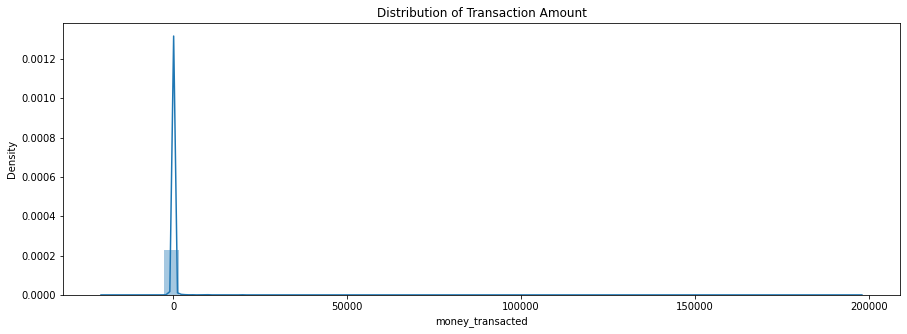

In [254]:
# check the distributions of transactions and its values
plt.figure(figsize=(15,5))
plt.title('Distribution of Transaction Amount')
sns.distplot(train_df.money_transacted)

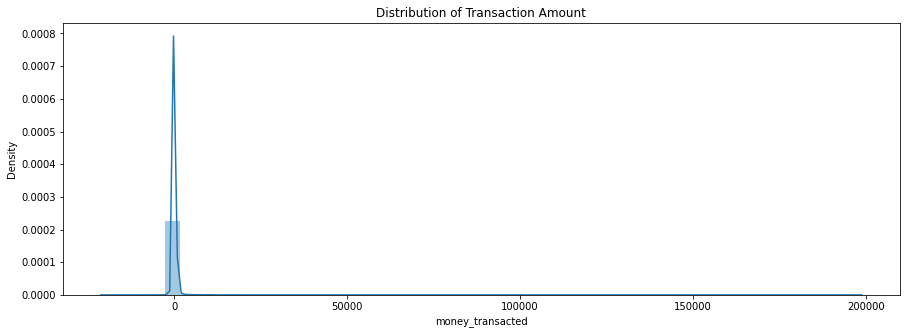

In [255]:
# check the distributions of transactions and its values
plt.figure(figsize=(15,5))
plt.title('Distribution of Transaction Amount')
sns.distplot(test_df.money_transacted)

In [256]:
# Fraudulent vs Valid transactions
valid = train_df.is_fraud.value_counts()[0]
fraud = train_df.is_fraud.value_counts()[1]

fraud_percent = (fraud/(fraud+valid))*100
valid_percent = (valid/(valid+fraud))*100

print('Number of Fradulent transactions are ', fraud, ' which is equivalent to ', fraud_percent, ' %')
print('Number of Fradulent transactions are ', valid, ' which is equivalent to ', valid_percent, ' %')

Number of Fradulent transactions are  154  which is equivalent to  0.20123090593108495  %
Number of Fradulent transactions are  76375  which is equivalent to  99.79876909406892  %


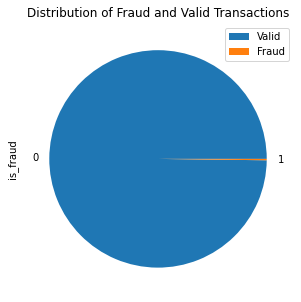

In [257]:

plt.figure(figsize=(5,5))
plt.title('Distribution of Fraud and Valid Transactions')
train_df['is_fraud'].value_counts().plot(kind = 'pie')
plt.legend(['Valid','Fraud'])
plt.show()

Text(0.5, 1.0, 'Fradulent Distributions 0: Valid 1: Fraud')

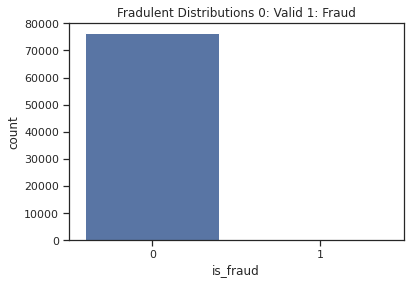

In [345]:
sns.countplot('is_fraud', data=train_df)
plt.title('Fradulent Distributions 0: Valid 1: Fraud')

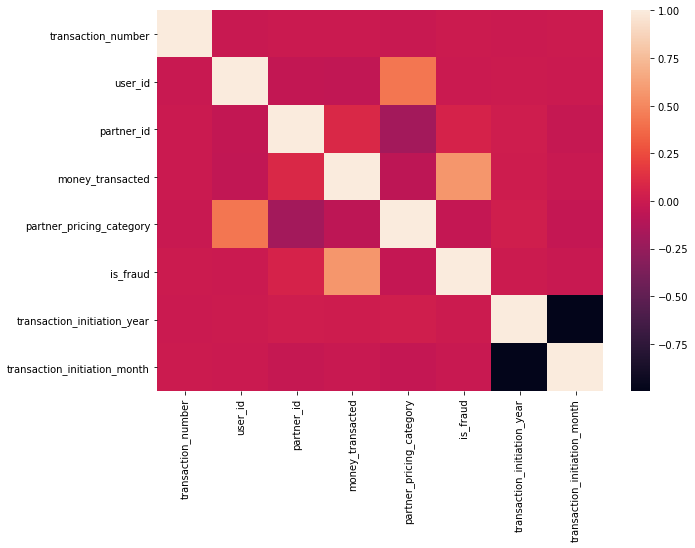

In [259]:
## let's see the correlation between our data
plt.figure(figsize = (10,7))
corr = train_df.corr()
sns.heatmap(corr)
plt.show()
# here we can see correlation between sibsp and parch columns

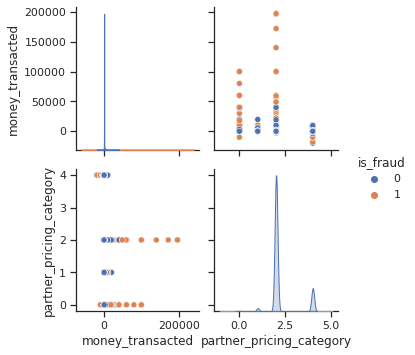

In [343]:
sns.set(style='ticks')
sns.pairplot(train_df[['money_transacted', 'partner_pricing_category','is_fraud']], hue='is_fraud')

#### Chec for uniqueness of all the columns 

In [346]:
for col in train_df.columns:
    if len(train_df[col].unique())/train_df[col].count() > 0.90:
        print(col)

transaction_number
transaction_initiation


In [347]:
for i in train_df.columns:
    print(i, ':', len(train_df[i].unique()))
    if len(train_df[i].unique()) < 30:
        print(train_df[i].unique())
    print('\n')

transaction_number : 76529


user_id : 3594


payment_method : 6
['sbi_atm_cum_debit_card' 'e_wallet_payments' 'other_debit_cards'
 'visa_master_debit_cards' 'visa_master_credit_cards'
 'unified_payments_interface']


partner_id : 23
[ 47334  78890 102557 118335  23667   7889  31556  86779 149891 165669
 110446 189336  55223  63112  15778 157780 213003 173558  39445 126224
  71001  94668 181447]


partner_category : 9
['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_6' 'cat_7' 'cat_8' 'cat_9']


country : 1
['IND_INR']


device_type : 4
['android_devices' 'other_pcs' 'windows_pcs' 'ios_devices']


money_transacted : 1454


transaction_initiation : 75811


partner_pricing_category : 4
[2 4 1 0]


is_fraud : 2
[0 1]




In [348]:
for i in test_df.columns:
    print(i, ':', len(test_df[i].unique()))
    if len(test_df[i].unique()) < 30:
        print(test_df[i].unique())
    print('\n')

transaction_number : 19133


user_id : 2617


payment_method : 6
['visa_master_debit_cards' 'e_wallet_payments' 'sbi_atm_cum_debit_card'
 'visa_master_credit_cards' 'other_debit_cards'
 'unified_payments_interface']


partner_id : 20
[118335  23667  47334  78890 157780  31556  86779   7889 165669 149891
 102557 110446  63112  15778 173558  55223 189336  71001  39445 213003]


partner_category : 8
['cat_1' 'cat_2' 'cat_7' 'cat_4' 'cat_3' 'cat_5' 'cat_6' 'cat_8']


country : 1
['IND_INR']


device_type : 4
['other_pcs' 'android_devices' 'windows_pcs' 'ios_devices']


money_transacted : 695


transaction_initiation : 19090


partner_pricing_category : 4
[2 1 4 0]




In [265]:
train_df.dtypes

transaction_number                       int64
user_id                                  int64
payment_method                          object
partner_id                               int64
partner_category                        object
country                                 object
device_type                             object
money_transacted                       float64
transaction_initiation          datetime64[ns]
partner_pricing_category                 int64
is_fraud                                 int64
transaction_initiation_year              int64
transaction_initiation_month             int64
dtype: object

In [266]:
test_df.dtypes

transaction_number                       int64
user_id                                  int64
payment_method                          object
partner_id                               int64
partner_category                        object
country                                 object
device_type                             object
money_transacted                       float64
transaction_initiation          datetime64[ns]
partner_pricing_category                 int64
transaction_initiation_year              int64
transaction_initiation_month             int64
dtype: object

In [267]:
X_test = test_df.copy(deep = False)

#### Drop Unnecessary variables

In [268]:
train_df.drop(['transaction_number', 'country'], axis = 1, inplace= True)
X_test.drop(['transaction_number', 'country'], axis = 1, inplace= True)

#### Separate Dependent and Independent variables

In [269]:
X = train_df.drop(['is_fraud'], axis = 1)
y = train_df['is_fraud']

#### Perform Train and Validation split

In [270]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 99191)

In [271]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(53570, 10)
(22959, 10)
(53570,)
(22959,)


### List of numeric columns

In [272]:
### numerical 
num_cols =  X_train.select_dtypes(include=['float64','int64']).columns
print(num_cols)

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'transaction_initiation_year', 'transaction_initiation_month'],
      dtype='object')


### List of Categorical columns

In [273]:
### categorical
cat_cols =  X_train.select_dtypes(include=['object']).columns
cat_cols

Index(['payment_method', 'partner_category', 'device_type'], dtype='object')

#### convert categorical columns datatype

In [274]:
X_train[cat_cols] = X_train[cat_cols].astype('category')
X_val[cat_cols] = X_val[cat_cols].astype('category')
X_test[cat_cols] = X_test[cat_cols].astype('category')

In [275]:
print(X_train.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

user_id                                  int64
payment_method                        category
partner_id                               int64
partner_category                      category
device_type                           category
money_transacted                       float64
transaction_initiation          datetime64[ns]
partner_pricing_category                 int64
transaction_initiation_year              int64
transaction_initiation_month             int64
dtype: object
user_id                                  int64
payment_method                        category
partner_id                               int64
partner_category                      category
device_type                           category
money_transacted                       float64
transaction_initiation          datetime64[ns]
partner_pricing_category                 int64
transaction_initiation_year              int64
transaction_initiation_month             int64
dtype: object
user_id                         

#### Missing value analysis

In [276]:
# print columns with missing values
train_df.isnull().sum()

user_id                         0
payment_method                  0
partner_id                      0
partner_category                0
device_type                     0
money_transacted                0
transaction_initiation          0
partner_pricing_category        0
is_fraud                        0
transaction_initiation_year     0
transaction_initiation_month    0
dtype: int64

In [277]:
test_df.isnull().sum()

transaction_number              0
user_id                         0
payment_method                  0
partner_id                      0
partner_category                0
country                         0
device_type                     0
money_transacted                0
transaction_initiation          0
partner_pricing_category        0
transaction_initiation_year     0
transaction_initiation_month    0
dtype: int64

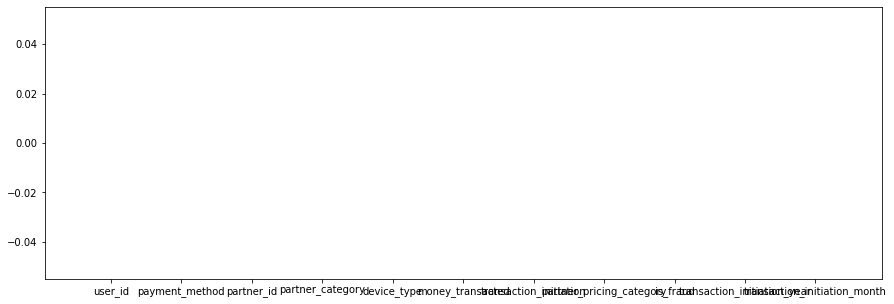

In [279]:
# visualizing null value is train data
plt.figure(figsize = (15,5))
plt.bar(train_df.columns, train_df.isna().sum())
plt.show()

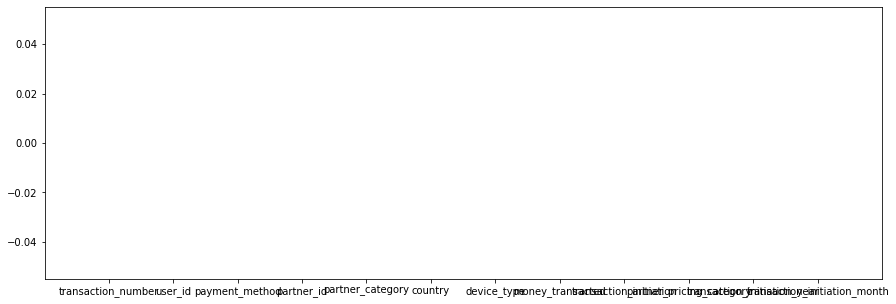

In [280]:
# visualizing null value is test data
plt.figure(figsize = (15,5))
plt.bar(test_df.columns, test_df.isna().sum(), color = 'green')
plt.show()

#### columns having maximum null values

In [281]:
train_df.count().sort_values()

user_id                         76529
payment_method                  76529
partner_id                      76529
partner_category                76529
device_type                     76529
money_transacted                76529
transaction_initiation          76529
partner_pricing_category        76529
is_fraud                        76529
transaction_initiation_year     76529
transaction_initiation_month    76529
dtype: int64

In [283]:
test_df.count().sort_values()

transaction_number              19133
user_id                         19133
payment_method                  19133
partner_id                      19133
partner_category                19133
country                         19133
device_type                     19133
money_transacted                19133
transaction_initiation          19133
partner_pricing_category        19133
transaction_initiation_year     19133
transaction_initiation_month    19133
dtype: int64

#### Imputation, Encoding, Transformation Use pipeline, transformer for building various models

In [284]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [285]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [286]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

### _Model 1: Building Logistic Regression_

In [287]:
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [288]:
lr.fit(X_val, y_val)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [289]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

In [290]:
classifcation_report_train_test(y_train, y_train_pred, y_val, y_val_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53464
           1       0.61      0.37      0.46       106

    accuracy                           1.00     53570
   macro avg       0.80      0.68      0.73     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22911
           1       0.72      0.38      0.49        48

    accuracy                           1.00     22959
   macro avg       0.86      0.69      0.75     22959
weighted avg       1.00      1.00      1.00     22959



([0.7272727272727272,
  0.23076923076923078,
  0.25,
  0.23529411764705882,
  0.28125,
  0.3296703296703297,
  0.3518518518518518,
  0.4153846153846154,
  0.39726027397260266,
  0.422360248447205],
 [0.525,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.375,
  0.36923076923076925,
  0.36923076923076925,
  0.36923076923076925])

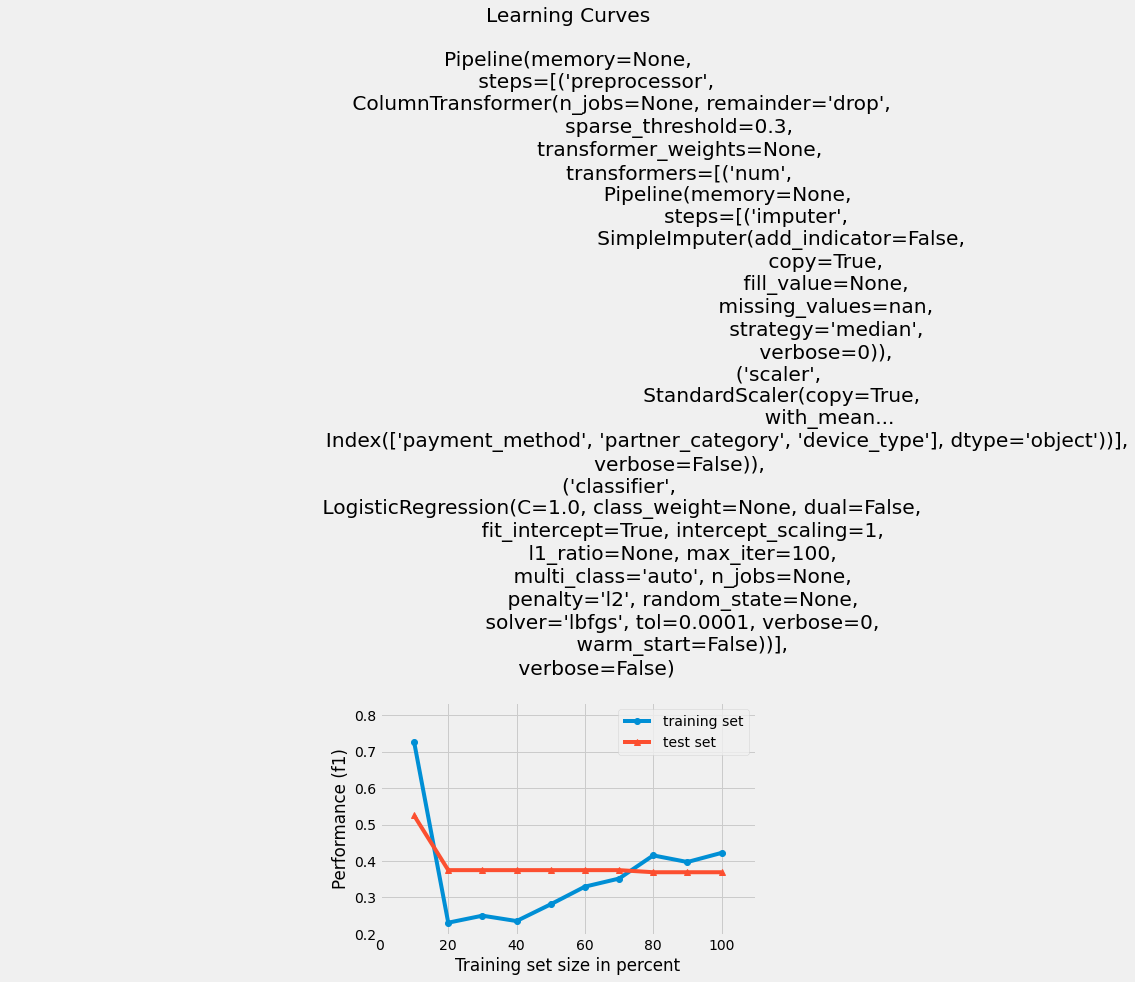

In [291]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_val, y_val, lr, scoring='f1')

### _Model 2: Building Decision Tree_

In [292]:
from sklearn.tree import DecisionTreeClassifier

In [293]:
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 
                 'classifier__max_depth': [3,5], 
                 "classifier__min_samples_split": [2, 5],
                 "classifier__min_samples_leaf": [1, 5]
                }

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)



In [294]:
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [295]:
dt_grid.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5}

In [296]:
y_train_pred = dt_grid.predict(X_train)
y_val_pred = dt_grid.predict(X_val)

In [297]:
classifcation_report_train_test(y_train, y_train_pred, y_val, y_val_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53464
           1       1.00      0.88      0.93       106

    accuracy                           1.00     53570
   macro avg       1.00      0.94      0.97     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22911
           1       0.88      0.77      0.82        48

    accuracy                           1.00     22959
   macro avg       0.94      0.89      0.91     22959
weighted avg       1.00      1.00      1.00     22959



([0.9090909090909091,
  0.9444444444444444,
  0.9411764705882353,
  0.9428571428571428,
  0.9069767441860465,
  0.9256198347107438,
  0.9185185185185185,
  0.9325153374233129,
  0.9392265193370166,
  0.9346733668341709],
 [0.7954545454545454,
  0.8125,
  0.8210526315789474,
  0.8571428571428572,
  0.8222222222222222,
  0.8314606741573034,
  0.8222222222222222,
  0.8222222222222222,
  0.8222222222222222,
  0.8222222222222222])

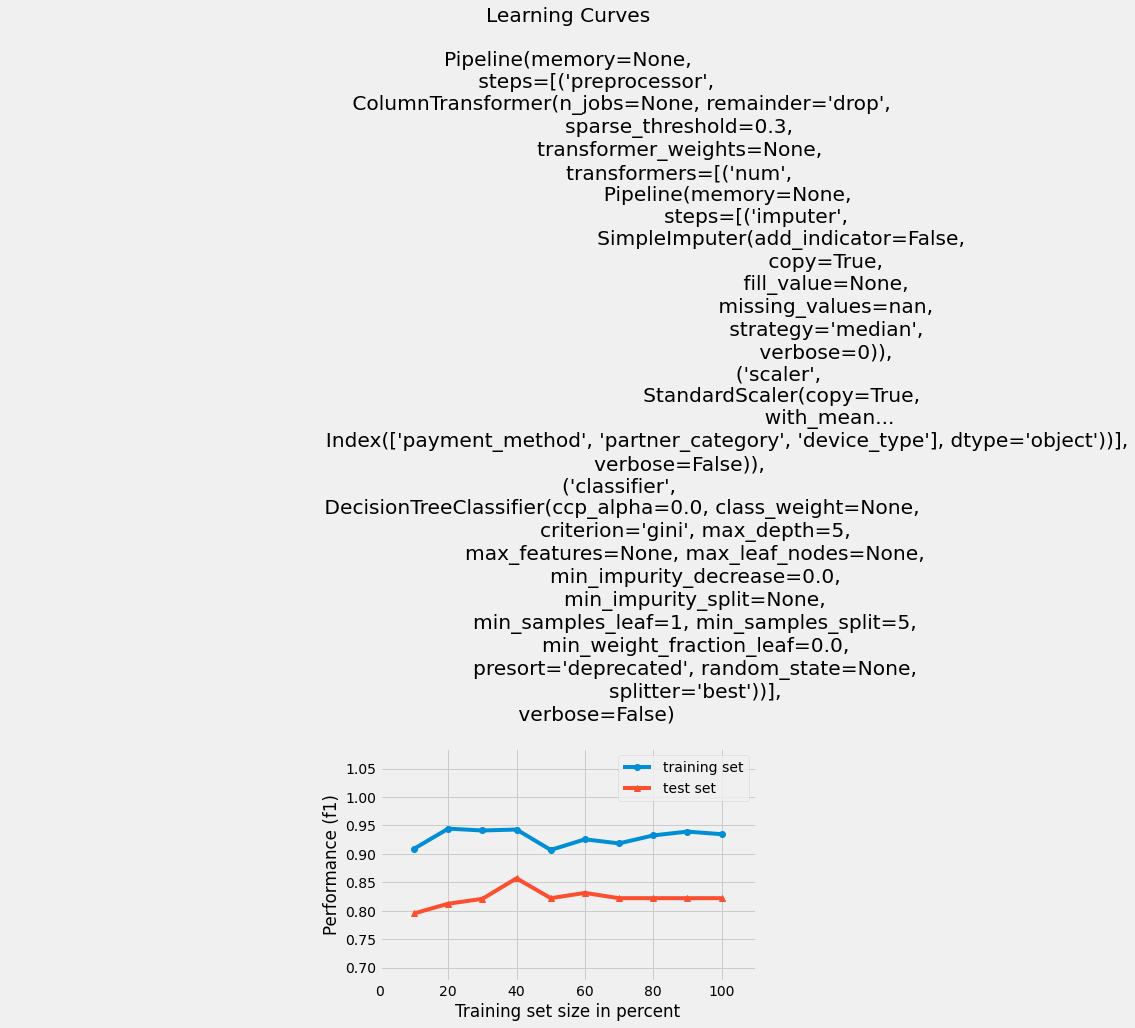

In [298]:
# Learning Curves

plot_learning_curves(X_train, y_train, X_val, y_val, dt_grid.best_estimator_, scoring='f1')

In [299]:
## so it is important that, in gridsearch we should tune the model according to our metric of interest - 'f1' here.
%%time
dt_grid1 = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=2, scoring='f1')

dt_grid1.fit(X_train, y_train)

y_train_pred = dt_grid1.predict(X_train)
y_val_pred = dt_grid1.predict(X_val)

classifcation_report_train_test(y_train, y_train_pred, y_val, y_val_pred)

# Observe that the f1 value on test is improved and overfitting is reduced wrt the recall value.


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53464
           1       0.96      0.90      0.93       106

    accuracy                           1.00     53570
   macro avg       0.98      0.95      0.96     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22911
           1       0.85      0.83      0.84        48

    accuracy                           1.00     22959
   macro avg       0.93      0.92      0.92     22959
weighted avg       1.00      1.00      1.00     22959

CPU times: user 24.8 s, sys: 2.37 s, total: 27.2 s
Wall time: 27.2 s


([0.8799999999999999,
  0.8648648648648649,
  0.896551724137931,
  0.8656716417910448,
  0.9361702127659575,
  0.944,
  0.9295774647887325,
  0.8957055214723926,
  0.9060773480662984,
  0.926829268292683],
 [0.7722772277227722,
  0.7191011235955055,
  0.679245283018868,
  0.7142857142857143,
  0.8695652173913043,
  0.8913043478260869,
  0.8631578947368421,
  0.7999999999999999,
  0.7999999999999999,
  0.8421052631578947])

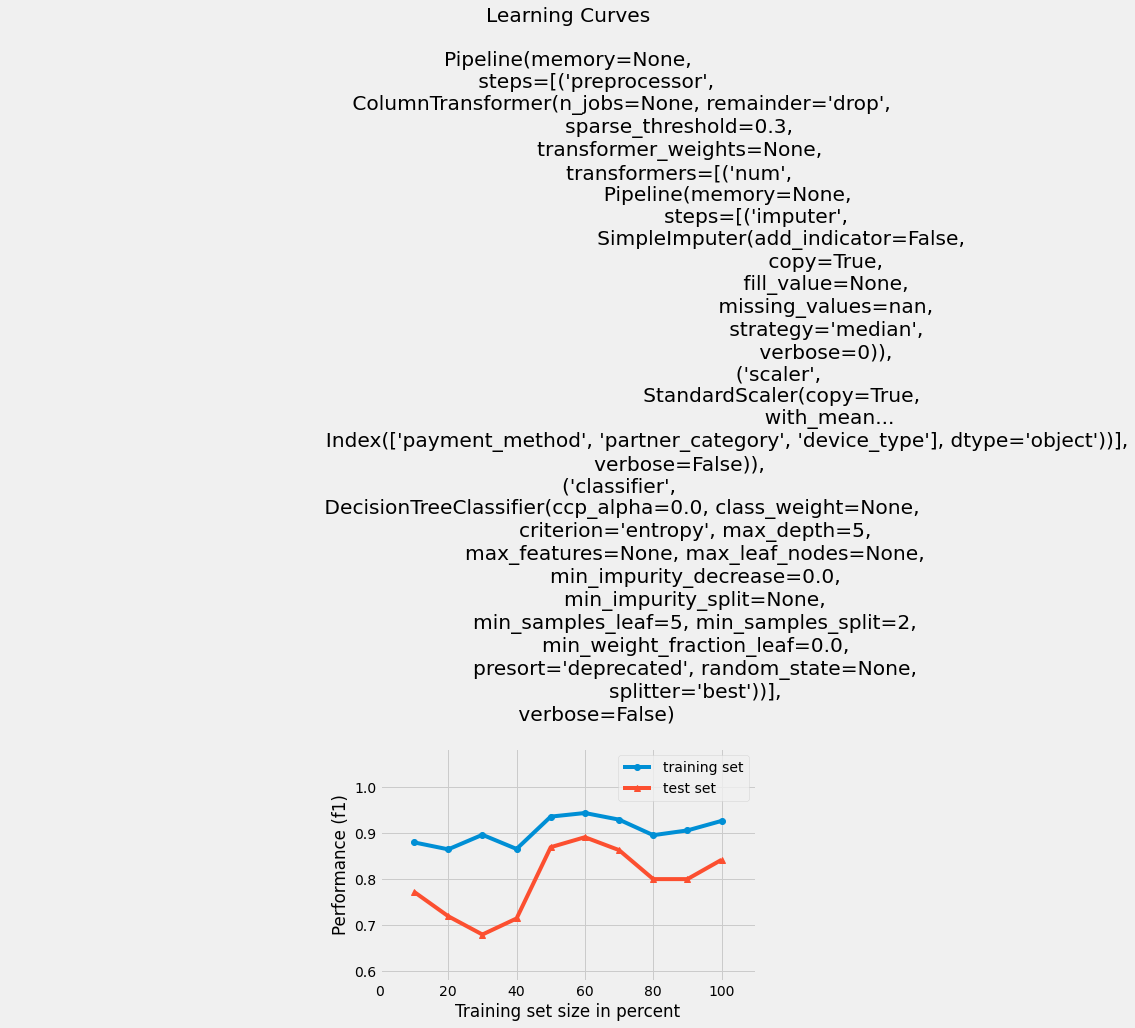

In [300]:
plot_learning_curves(X_train, y_train, X_val, y_val, dt_grid1.best_estimator_, scoring='f1')

### _Model 3: Building Random Forest_ (Using Stratified KFold)


In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [302]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [303]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8], 
                 "classifier__min_samples_split": [2, 6],"classifier__min_samples_leaf": [1, 5]}

param_grid1 = {"classifier__n_estimators" : [150, 250, 300],
              "classifier__max_depth" : [5,8,10],
              "classifier__max_features" : [3, 5, 7],
              "classifier__min_samples_leaf" : [4, 6, 8, 10]}

rf_grid = GridSearchCV(rf, param_grid=dt_param_grid, cv=kfold)

In [304]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                

In [305]:
rf_grid.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2}

In [306]:
y_train_pred = rf_grid.predict(X_train)
y_val_pred = rf_grid.predict(X_val)

In [307]:
classifcation_report_train_test(y_train, y_train_pred, y_val, y_val_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53464
           1       1.00      0.83      0.91       106

    accuracy                           1.00     53570
   macro avg       1.00      0.92      0.95     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22911
           1       0.86      0.67      0.75        48

    accuracy                           1.00     22959
   macro avg       0.93      0.83      0.88     22959
weighted avg       1.00      1.00      1.00     22959



([0.9565217391304348,
  0.9142857142857143,
  0.8,
  0.6909090909090909,
  0.8674698795180723,
  0.8947368421052632,
  0.9104477611940298,
  0.8774193548387098,
  0.896551724137931,
  0.9137055837563451],
 [0.47058823529411764,
  0.537313432835821,
  0.360655737704918,
  0.30508474576271183,
  0.675,
  0.7407407407407406,
  0.7906976744186046,
  0.738095238095238,
  0.7816091954022988,
  0.8000000000000002])

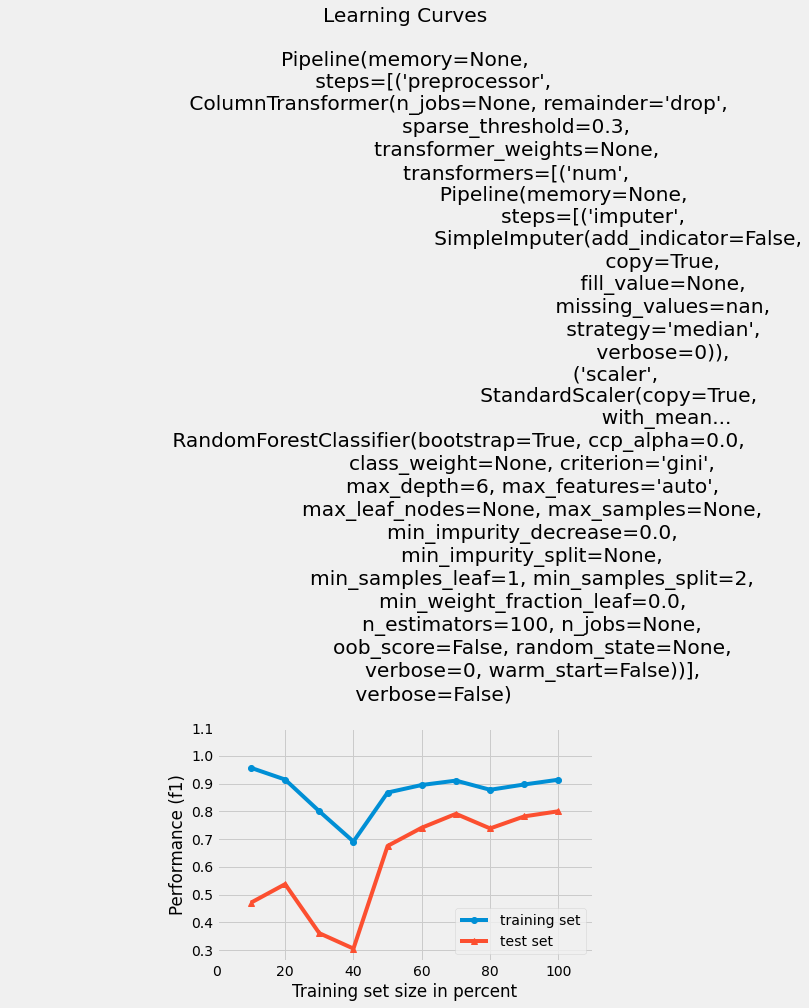

In [308]:
plot_learning_curves(X_train, y_train, X_val, y_val, rf_grid.best_estimator_, scoring='f1')

### _Model 4: Building Gradient Boosting_

In [309]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [310]:
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('XGB',XGBClassifier(scale_pos_weight=100))])

In [311]:
xgb_param_grid = {'XGB__scale_pos_weight' : [1, 10, 25],
                  'XGB__max_depth': [8,10,12], 
                  'XGB__subsample': [0.8, 0.6,], 
                  'XGB__max_features':[0.2, 0.3], 
                  'XGB__n_estimators': [10, 20]
}
                                        
xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=3, scoring='f1')

xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [312]:
xgb_grid.best_params_

{'XGB__max_depth': 8,
 'XGB__max_features': 0.2,
 'XGB__n_estimators': 20,
 'XGB__scale_pos_weight': 1,
 'XGB__subsample': 0.8}

In [313]:
y_train_pred = xgb_grid.predict(X_train)
y_val_pred = xgb_grid.predict(X_val)

In [314]:
classifcation_report_train_test(y_train, y_train_pred, y_val, y_val_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53464
           1       1.00      0.86      0.92       106

    accuracy                           1.00     53570
   macro avg       1.00      0.93      0.96     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22911
           1       0.90      0.75      0.82        48

    accuracy                           1.00     22959
   macro avg       0.95      0.87      0.91     22959
weighted avg       1.00      1.00      1.00     22959



([0.8799999999999999,
  0.8823529411764706,
  0.9019607843137256,
  0.911764705882353,
  0.9090909090909092,
  0.8965517241379309,
  0.9104477611940298,
  0.906832298136646,
  0.9101123595505618,
  0.9238578680203046],
 [0.7722772277227722,
  0.7317073170731708,
  0.7209302325581395,
  0.7586206896551724,
  0.8181818181818182,
  0.8275862068965517,
  0.8275862068965517,
  0.8275862068965517,
  0.8275862068965517,
  0.8181818181818182])

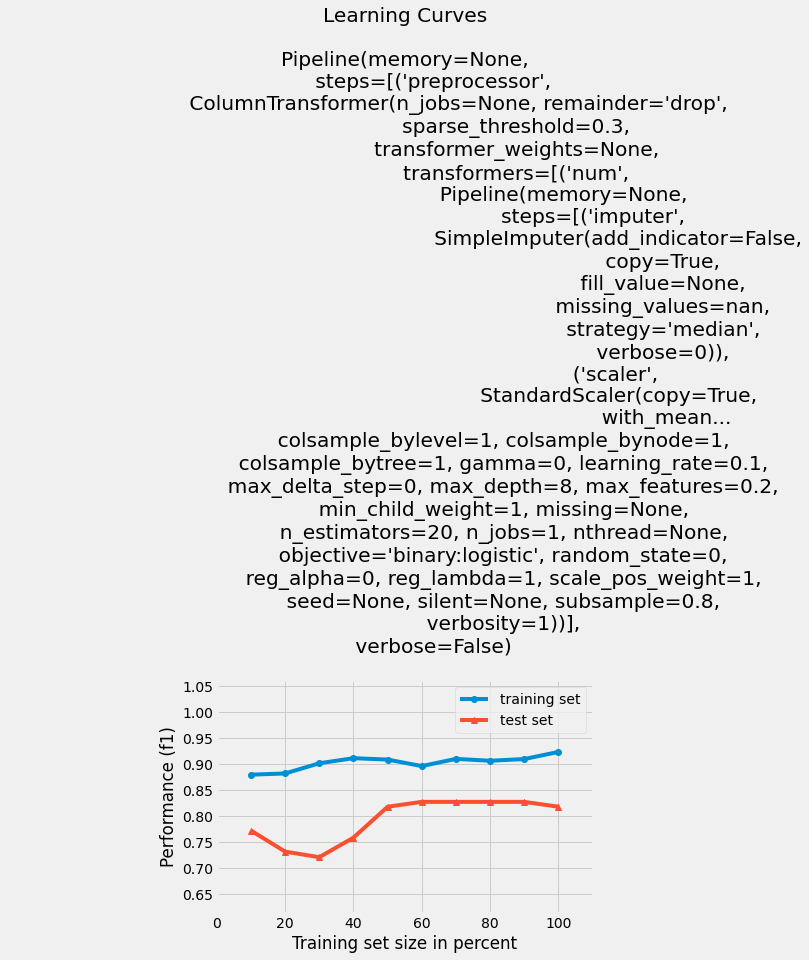

In [315]:
plot_learning_curves(X_train, y_train, X_val, y_val, xgb_grid.best_estimator_, scoring='f1')

#### Saving the model for later use & loading it for predictions

In [316]:
import pickle

In [317]:
# Saving the model to a specific location

pickle.dump(xgb_grid.best_estimator_, open('/content/gdrive/MyDrive/INSOFE-Batch89/MiTH/xgb_best_modelv2.pickle', 'wb'))

In [318]:
# Loading the model from the given location to do the predictions

xgb_loaded = pickle.load(open('/content/gdrive/MyDrive/INSOFE-Batch89/MiTH/xgb_best_modelv2.pickle', 'rb'))

In [319]:
# Using the loaded model for the predictions & evaluations

y_train_pred = xgb_grid.predict(X_train)
y_val_pred = xgb_grid.predict(X_val)

classifcation_report_train_test(y_train, y_train_pred, y_val, y_val_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53464
           1       1.00      0.86      0.92       106

    accuracy                           1.00     53570
   macro avg       1.00      0.93      0.96     53570
weighted avg       1.00      1.00      1.00     53570


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22911
           1       0.90      0.75      0.82        48

    accuracy                           1.00     22959
   macro avg       0.95      0.87      0.91     22959
weighted avg       1.00      1.00      1.00     22959



#### Obtaining the Predictions on the final test data

In [320]:
y_test_final_pred = xgb_loaded.predict(X_test)

#### Output in sample submission format

In [321]:
test_results_df = pd.DataFrame({
        "transaction_number": test_df["transaction_number"],
        "is_fraud": y_test_final_pred
    })

test_results_df.to_csv('/content/gdrive/MyDrive/INSOFE-Batch89/MiTH/Chaitanya_GondiNanda_B89_MiTH_predictions_submission.csv', index=False)

#### Recommendations to the Business

* Prioritize the customers who never had any fradulent transactions

* More fradulent transactions for partner pricing category 2

* More fradulent transactions for partner category cat_1

* No fradulent transactions when it happened from ios device

* No fradulent transactions when paid using Unified Payment Interface

* Amount is also important consideration for transaction to be fradulent, Keep multiple authentications for higher amounts

* XGBoost with hyper parameter tuning using Gridsearch is the final model that gave me best results (f1 score)

* XGBoost is implementation of gradient boosting for optimizing loss function, it handles Regularization and sparse data

* Simple strategies: Improve security, implement multiple authentication for large transactions, more scrutiny during the months of Nov, Dec, Jan and Feb, Implement unified payment interface
